# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [ ]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [ ]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [ ]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [ ]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 393 ms, sys: 12.1 ms, total: 405 ms
Wall time: 433 ms
Train ROC-AUC 0.9901
Valid ROC-AUC 0.9217
Test ROC-AUC 0.9281


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

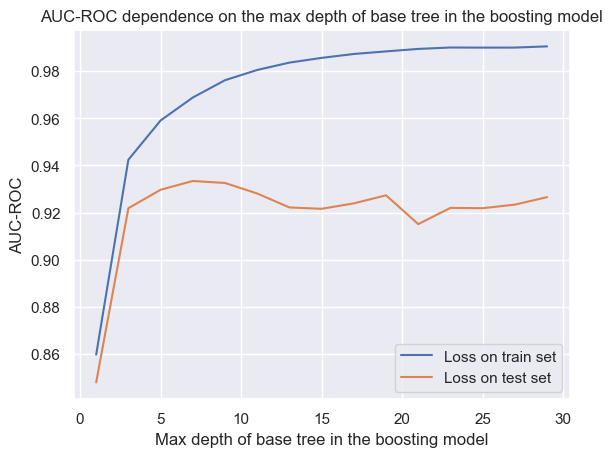

In [ ]:
results = {'train': [], 'test': []}


depths = list(range(1, 30, 2))

# YOUR CODE:
for depth in depths:
    params_depth = {'max_depth': depth}
    boosting_depth = Boosting(base_model_params=params_depth)
    boosting_depth.fit(x_train, y_train, x_valid, y_valid)
    results['train'].append(boosting_depth.score(x_train, y_train))
    results['test'].append(boosting_depth.score(x_test, y_test))

plt.plot(depths, results['train'], label='Loss on train set')
plt.plot(depths, results['test'], label='Loss on test set')
plt.legend()
plt.xlabel("Max depth of base tree in the boosting model")
plt.ylabel("AUC-ROC")
plt.title('AUC-ROC dependence on the max depth of base tree in the boosting model')
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Видим, что на тестовых данных, начиная с глубины 7-8, AUC-ROC снижается, при этом с ростом максимальной глубины AUC-ROC на тренировочных данных, наоборот, растёт. С точки зрения обобщения генеральной зависимости на всю совокупность нам лучше всего подходит модель с макс. глубиной, равной 7. Это связано с тем, что более глубокие деревья сильно переобучаются при текущих гиперпараметрах.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [ ]:
!pip install optuna


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import optuna

In [ ]:
# YOUR CODE:

def objective_with_stopping(trial):
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    n_estimators = trial.suggest_int("n_estimators", 5, 50)
    learning_rate = trial.suggest_float("learning_rate", 1e-10, 1, log=True)
    subsample = trial.suggest_float("subsample", 0.1, 1)
    early_stopping_rounds = trial.suggest_int("early_stopping_rounds", 2, 32, log=True)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 15)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 12)
    tree_params = {"max_depth": max_depth, "min_samples_split": min_samples_split, "min_samples_leaf": min_samples_leaf}
    boosting_hp = Boosting(base_model_params=tree_params, n_estimators=n_estimators, learning_rate=learning_rate,
                           subsample=subsample, early_stopping_rounds=early_stopping_rounds)
    boosting_hp.fit(x_train, y_train, x_valid, y_valid)
    return boosting_hp.score(x_valid, y_valid)

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_with_stopping, n_trials=100)
print(study.best_trial)

[I 2023-12-14 17:37:41,168] A new study created in memory with name: no-name-3a148dd5-5544-4ef8-8067-ef27f756af74


[I 2023-12-14 17:37:41,324] Trial 0 finished with value: 0.9315215994470133 and parameters: {'max_depth': 5, 'n_estimators': 17, 'learning_rate': 5.294408220850096e-06, 'subsample': 0.3278874873224774, 'early_stopping_rounds': 5, 'min_samples_split': 12, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9315215994470133.
[I 2023-12-14 17:37:41,596] Trial 1 finished with value: 0.922939849125941 and parameters: {'max_depth': 4, 'n_estimators': 22, 'learning_rate': 0.0237658408488329, 'subsample': 0.8662985361629132, 'early_stopping_rounds': 6, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9315215994470133.
[I 2023-12-14 17:37:41,929] Trial 2 finished with value: 0.9197546680203985 and parameters: {'max_depth': 3, 'n_estimators': 37, 'learning_rate': 1.0084848437380983e-09, 'subsample': 0.5158550935294104, 'early_stopping_rounds': 13, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9315215994470133.
[I 2023-12-14 17:37:42,

FrozenTrial(number=84, state=TrialState.COMPLETE, values=[0.9397098416149638], datetime_start=datetime.datetime(2023, 12, 14, 17, 39, 3, 348155), datetime_complete=datetime.datetime(2023, 12, 14, 17, 39, 4, 885862), params={'max_depth': 19, 'n_estimators': 33, 'learning_rate': 6.771451254719179e-07, 'subsample': 0.44201846592637734, 'early_stopping_rounds': 28, 'min_samples_split': 3, 'min_samples_leaf': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=32, log=True, low=2, step=1), 'n_estimators': IntDistribution(high=50, log=False, low=5, step=1), 'learning_rate': FloatDistribution(high=1.0, log=True, low=1e-10, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.1, step=None), 'early_stopping_rounds': IntDistribution(high=32, log=True, low=2, step=1), 'min_samples_split': IntDistribution(high=15, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=12, log=False, low=1, step=1)}, trial_id=84

In [ ]:
params = study.best_trial.params
tree_params = {"max_depth": params["max_depth"],
               "min_samples_split": params["min_samples_split"],
               "min_samples_leaf": params["min_samples_leaf"]}
best_model = Boosting(base_model_params=tree_params,
                      n_estimators=params['n_estimators'],
                      subsample=params['subsample'],
                      learning_rate=params['learning_rate'],
                      early_stopping_rounds=params['early_stopping_rounds'])
best_model.fit(x_train, y_train, x_valid, y_valid)
print(f'Train ROC-AUC {best_model.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {best_model.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {best_model.score(x_test, y_test):.4f}')

Train ROC-AUC 0.9792
Valid ROC-AUC 0.9368
Test ROC-AUC 0.9356


## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [ ]:
# YOUR CODE:

def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid()



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_logistic = LogisticRegression()
model_logistic = model_logistic.fit(x_train, y_train)
probs_logistic = model_logistic.predict_proba(x_test)[:,1]

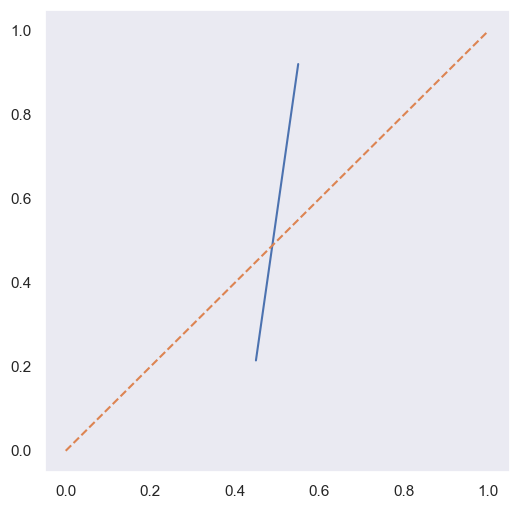

In [ ]:
plot_calibration_curve(y_test, best_model.predict_proba(x_test)[:, 1])
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--')

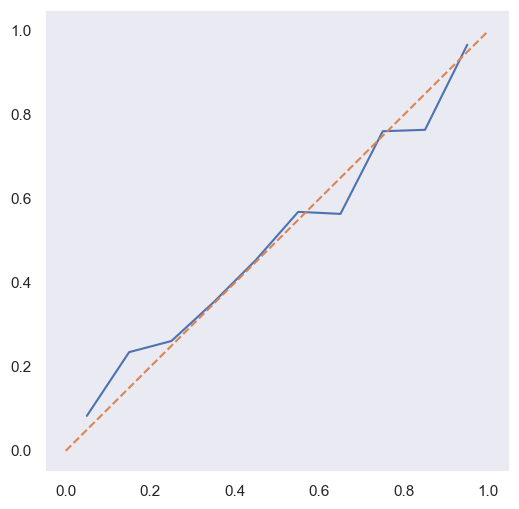

In [ ]:
plot_calibration_curve(y_test, probs_logistic)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle='--')

Видим, что бустинг слишком сильно неуверен в своих предсказаниях и даёт предсказания, близкие к 1/2

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

Посмотрим на топ-20 признаков для каждого из алгоритмов, у остальных признаков значимость будет околонулевая:

Text(0.5, 1.0, 'Feature importances for linear classifier')

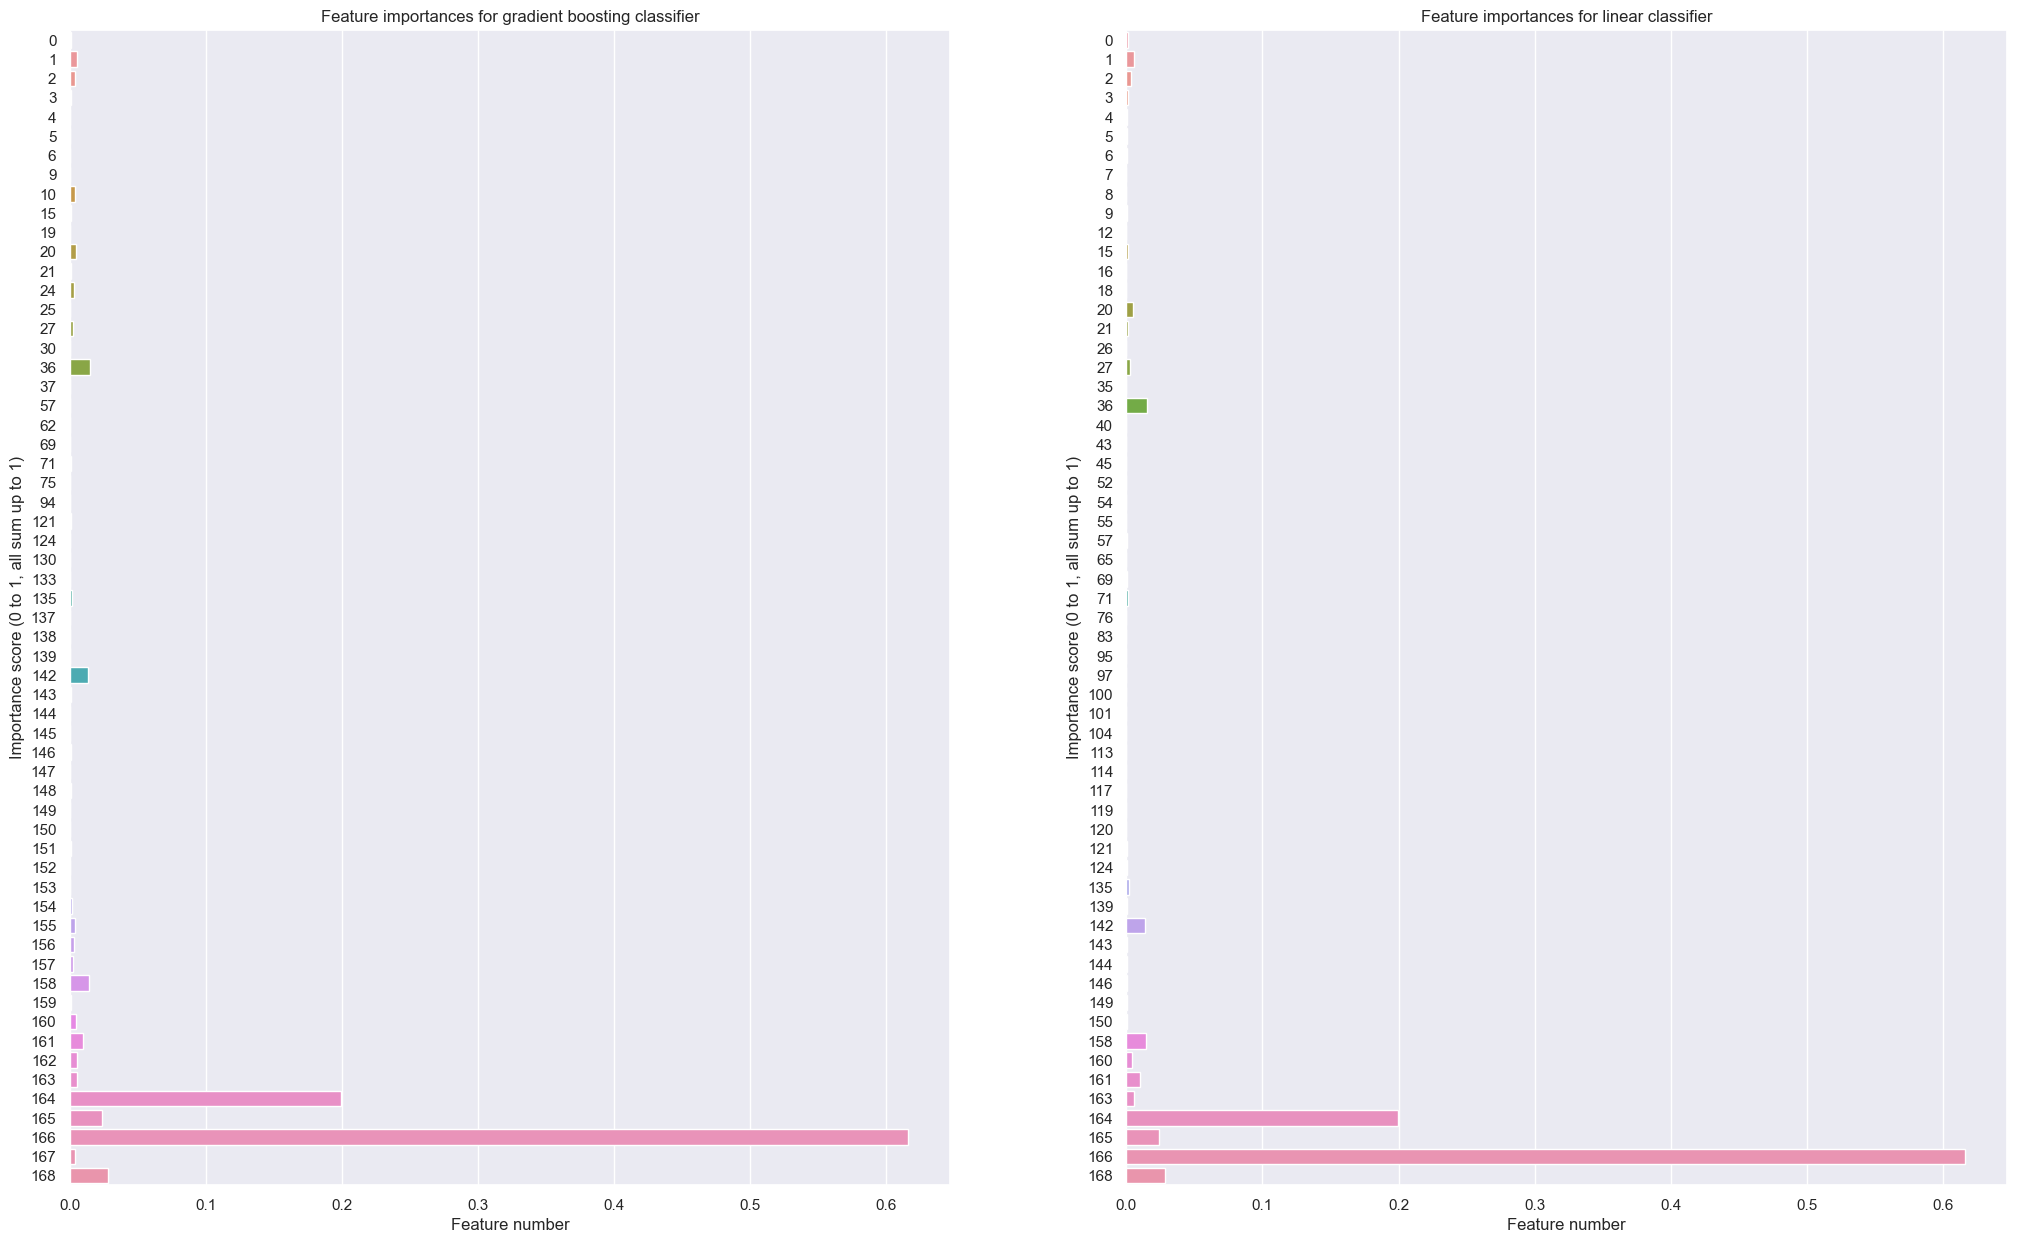

In [ ]:
# YOUR CODE:

fig, ax = plt.subplots(1, 2, figsize=(25, 15))
feature_imp_boosting = best_model.feature_importances_.reshape((-1, ))
boosting_features_indices = np.argsort(feature_imp_boosting)[::-1]
# print(best_model.feature_importances_)
sns.barplot(x=feature_imp_boosting[boosting_features_indices][:60], y=boosting_features_indices[:60], ax=ax[0], orient="h")
ax[0].set_xlabel('Feature number')
ax[0].set_ylabel('Importance score (0 to 1, all sum up to 1)')
ax[0].set_title('Feature importances for gradient boosting classifier')

feature_imp_linear = np.abs(model_logistic.coef_).reshape((-1, ))
linear_features_indices = np.argsort(feature_imp_linear)
# print(best_model.feature_importances_)
sns.barplot(x=feature_imp_boosting[linear_features_indices][-60:], y=linear_features_indices[-60:], ax=ax[1], orient="h")
ax[1].set_xlabel('Feature number')
ax[1].set_ylabel('Importance score (0 to 1, all sum up to 1)')
ax[1].set_title('Feature importances for linear classifier')

Заметим, что самые "полезные" признаки у обеих моделей почти одинаковые, а вот пул малополезных признаков при этом ранжируется по-разному.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

Оставим как топ-100 лучших признаков и обучим бустинг на них:

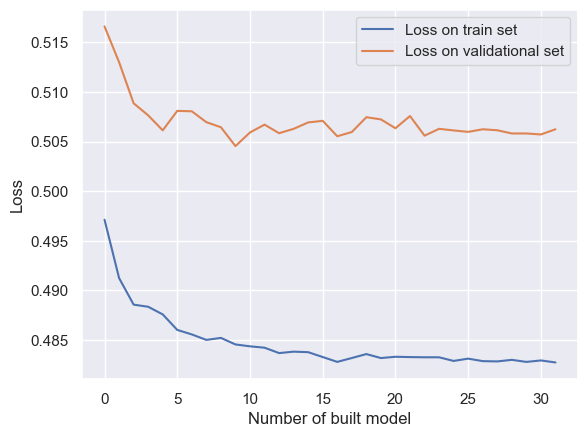

Train ROC-AUC 0.9789
Valid ROC-AUC 0.9381
Test ROC-AUC 0.9361


In [ ]:
# YOUR CODE:

best_features = boosting_features_indices[:60]

x_train_filtrated = x_train[:, best_features]
x_valid_filtrated = x_valid[:, best_features]
x_test_filtrated = x_test[:, best_features]

best_model_features = Boosting(base_model_params=tree_params,
                                n_estimators=params['n_estimators'],
                                subsample=params['subsample'],
                                learning_rate=params['learning_rate'],
                                early_stopping_rounds=params['early_stopping_rounds'], plot=True)
best_model_features.fit(x_train_filtrated, y_train, x_valid_filtrated, y_valid)
print(f'Train ROC-AUC {best_model_features.score(x_train_filtrated, y_train):.4f}')
print(f'Valid ROC-AUC {best_model_features.score(x_valid_filtrated, y_valid):.4f}')
print(f'Test ROC-AUC {best_model_features.score(x_test_filtrated, y_test):.4f}')

Качество на обучающей выборке слегка упало, на тестовой/валидационной - на самую малость подрасло. Считаем, что стало лучше

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# YOUR CODE:

blender = LogisticRegression()
x_for_blend = np.hstack([ best_model_features.predict_proba(x_valid_filtrated)[:, 1].reshape((-1, 1)),
                          model_logistic.predict_proba(x_valid)[:, 1].reshape((-1, 1))])
blender = blender.fit(x_for_blend, y_valid)

In [ ]:
x_test_for_blender = np.hstack([ best_model_features.predict_proba(x_test_filtrated)[:, 1].reshape((-1, 1)),
                                model_logistic.predict_proba(x_test)[:, 1].reshape((-1, 1))])
print(f'Test ROC-AUC for blending model: {roc_auc_score(y_test == 1, blender.predict_proba(x_test_for_blender)[:, 1]):.4f}')

Test ROC-AUC for blending model: 0.9379


Качество улучшилось, но, опять-таки, не космически сильно.

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 1.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 934.0 kB/s eta 0:00:00 0:00:01
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# YOUR CODE:
import catboost as cb

In [ ]:
catboost_model = cb.CatBoostClassifier()
catboost_model = catboost_model.fit(x_train, y_train)

Learning rate set to 0.036078
0:	learn: 0.6491456	total: 4.88ms	remaining: 4.88s
1:	learn: 0.6106099	total: 8.07ms	remaining: 4.03s
2:	learn: 0.5804628	total: 12ms	remaining: 4s
3:	learn: 0.5522560	total: 15.5ms	remaining: 3.85s
4:	learn: 0.5262191	total: 19.6ms	remaining: 3.89s
5:	learn: 0.5008078	total: 23ms	remaining: 3.81s
6:	learn: 0.4812964	total: 26.6ms	remaining: 3.77s
7:	learn: 0.4620363	total: 30.1ms	remaining: 3.73s
8:	learn: 0.4461815	total: 33.6ms	remaining: 3.69s
9:	learn: 0.4303349	total: 37.6ms	remaining: 3.73s
10:	learn: 0.4142074	total: 41ms	remaining: 3.68s
11:	learn: 0.4011999	total: 44.3ms	remaining: 3.65s
12:	learn: 0.3907486	total: 47.4ms	remaining: 3.59s
13:	learn: 0.3808039	total: 50.7ms	remaining: 3.57s
14:	learn: 0.3710193	total: 54.3ms	remaining: 3.56s
15:	learn: 0.3641416	total: 57.7ms	remaining: 3.55s
16:	learn: 0.3554514	total: 60.8ms	remaining: 3.51s
17:	learn: 0.3492318	total: 64.2ms	remaining: 3.5s
18:	learn: 0.3419544	total: 67.8ms	remaining: 3.5s
19:

In [ ]:
print(f'Test ROC-AUC for CatBoost: {roc_auc_score(y_test == 1, catboost_model.predict_proba(x_test)[:, 1]):.4f}')

Test ROC-AUC for CatBoost: 0.9416


У CatBoost из коробки (мы не тюнили ничего) получилось сделать лучше в терминах AUC-ROC, нежели у нашего блендинга с рукописным деревом с подобранными гиперпараметрами.

Вывод - не стоит придумывать велосипед.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

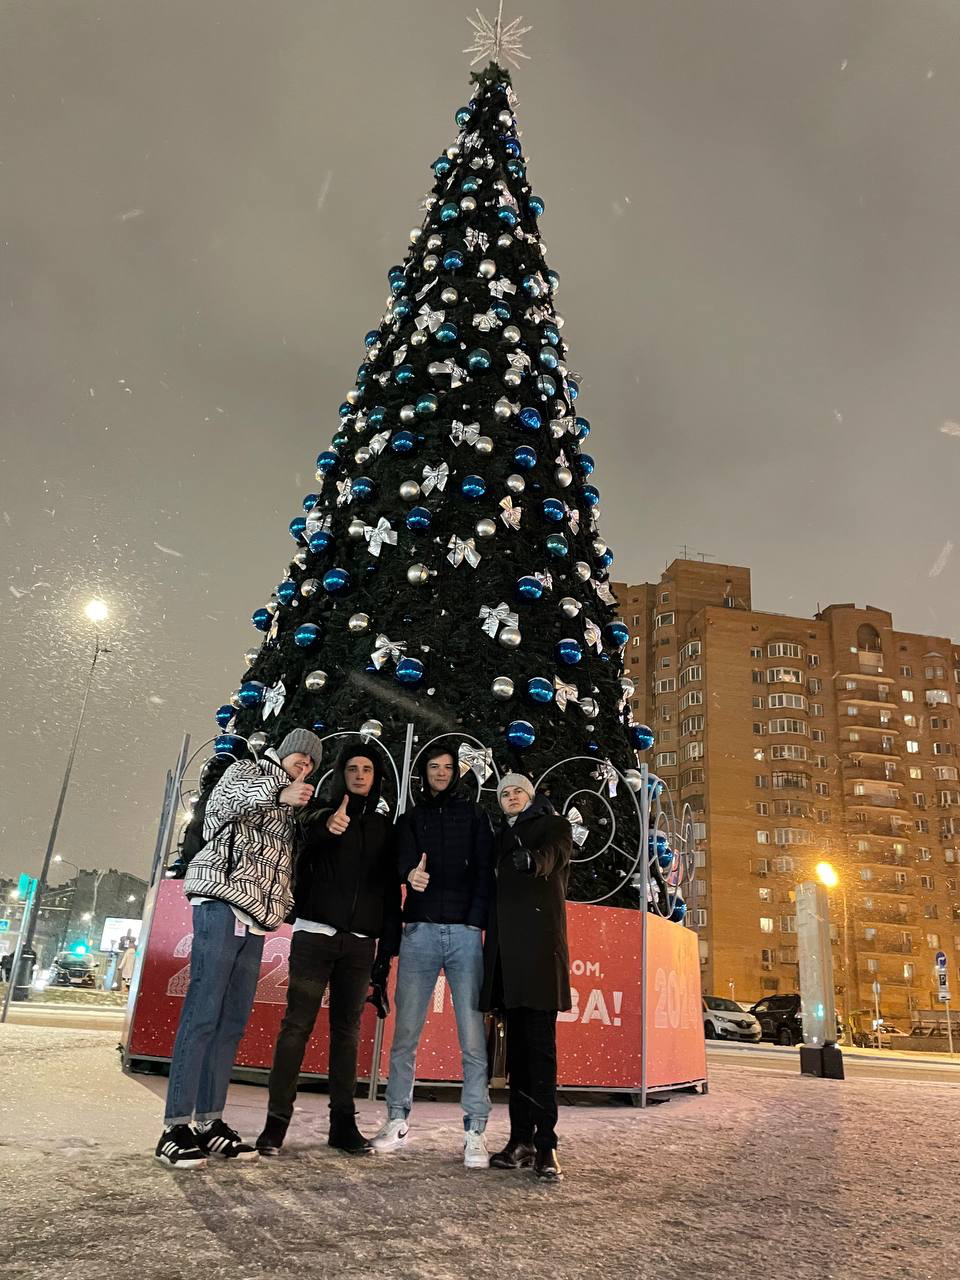

С братвой у елки. Впечатления - красивая елка. Желаем мира в каждом доме.